In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [3]:
dados = pd.read_csv('yt.csv', encoding='latin1')

In [4]:
print(dados['created_year'])

0      2006.0
1      2006.0
2      2012.0
3      2006.0
4      2006.0
        ...  
990    2017.0
991    2018.0
992    2006.0
993    2012.0
994    2017.0
Name: created_year, Length: 995, dtype: float64


In [5]:
tipo_de_dados = dados['created_year'].dtypes
print(tipo_de_dados)

float64


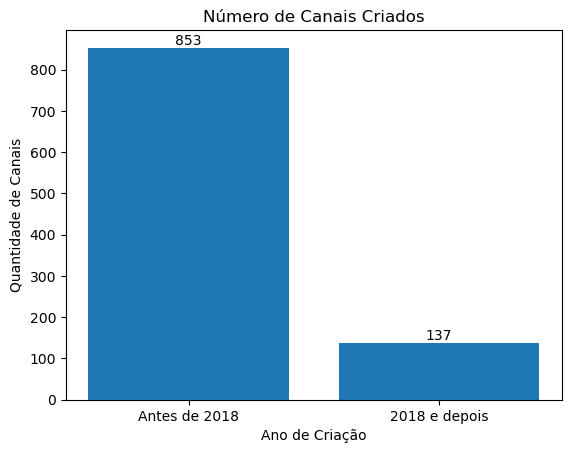

In [6]:
# Separando os dados em dois grupos (antes e depois de 2018)
canais_antes_2018 = dados[dados['created_year'] < 2018]
canais_2018_e_depois = dados[dados['created_year'] >= 2018]

# Contando a quantidade de canais em cada grupo
qtd_antes_2018 = len(canais_antes_2018)
qtd_2018_e_depois = len(canais_2018_e_depois)

# Preparando os dados para o gráfico
categorias = ['Antes de 2018', '2018 e depois']
quantidades = [qtd_antes_2018, qtd_2018_e_depois]

# Criando o gráfico de barras
plt.bar(categorias, quantidades)

# Adicionando os rótulos de quantidade em cima das barras
for i, valor in enumerate(quantidades):
    plt.text(i, valor + 0.1, str(valor), ha='center', va='bottom')
    
# Adicionando título e rótulos
plt.title('Número de Canais Criados')
plt.xlabel('Ano de Criação')
plt.ylabel('Quantidade de Canais')

# Exibindo o gráfico
plt.show()

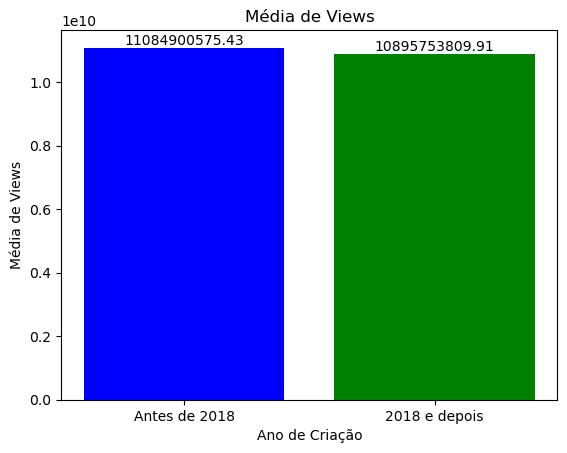

In [7]:
# Calculando a média de views para canais antes de 2018 e a partir de 2018
media_views_antes_2018 = dados[dados['created_year'] < 2018]['video views'].mean()
media_views_2018_e_depois = dados[dados['created_year'] >= 2018]['video views'].mean()

# Preparando os dados para o novo gráfico de barras
categorias = ['Antes de 2018', '2018 e depois']
medias_views = [media_views_antes_2018, media_views_2018_e_depois]

# Criando o novo gráfico de barras
plt.bar(categorias, medias_views, color=['blue', 'green'])

# Adicionando os valores acima das barras
for i, valor in enumerate(medias_views):
    plt.text(i, valor + 0.1, f'{valor:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Adicionando título e rótulos
plt.title('Média de Views')
plt.xlabel('Ano de Criação')
plt.ylabel('Média de Views')

# Exibindo o gráfico
plt.show()


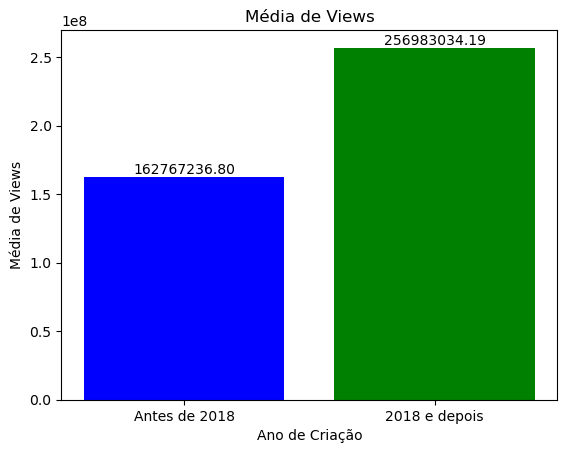

In [8]:
# Calculando a média de views nos ultimos 30 dias para canais antes de 2018 e a partir de 2018
media_views_30dias_antes_2018 = dados[dados['created_year'] < 2018]['video_views_for_the_last_30_days'].mean()
media_views_30dias_2018_e_depois = dados[dados['created_year'] >= 2018]['video_views_for_the_last_30_days'].mean()

# Preparando os dados para o novo gráfico de barras
categorias = ['Antes de 2018', '2018 e depois']
medias_views = [media_views_30dias_antes_2018, media_views_30dias_2018_e_depois]

# Criando o novo gráfico de barras
plt.bar(categorias, medias_views, color=['blue', 'green'])

# Adicionando os valores acima das barras
for i, valor in enumerate(medias_views):
    plt.text(i, valor + 0.1, f'{valor:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Adicionando título e rótulos
plt.title('Média de Views')
plt.xlabel('Ano de Criação')
plt.ylabel('Média de Views')

# Exibindo o gráfico
plt.show()


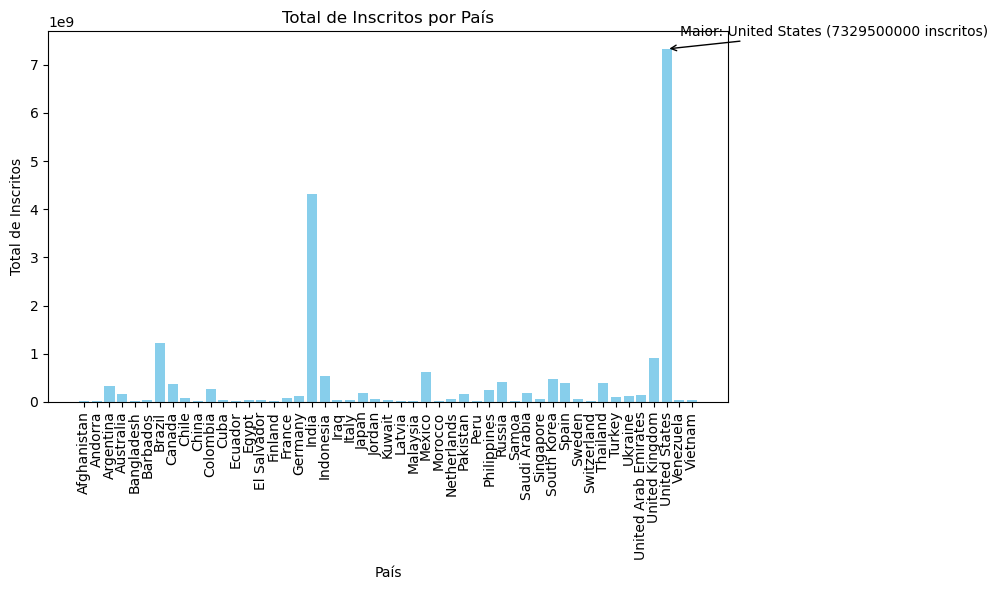

In [9]:
#País com mais inscritos
total_inscritos_por_pais = dados.groupby('Country')['subscribers'].sum()

# Encontrando o país com o maior número de inscritos
pais_maior_inscritos = total_inscritos_por_pais.idxmax()
maior_inscritos = total_inscritos_por_pais.max()

# Preparando dados para o gráfico de barras
paises = total_inscritos_por_pais.index
inscritos = total_inscritos_por_pais.values

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(paises, inscritos, color='skyblue')
plt.title('Total de Inscritos por País')
plt.xlabel('País')
plt.ylabel('Total de Inscritos')

# Adicionando anotação sobre o país com o maior número de inscritos
plt.annotate(f'Maior: {pais_maior_inscritos} ({maior_inscritos} inscritos)',
             xy=(paises.tolist().index(pais_maior_inscritos), maior_inscritos),
             xytext=(10, 10),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='black'))

# Adicionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

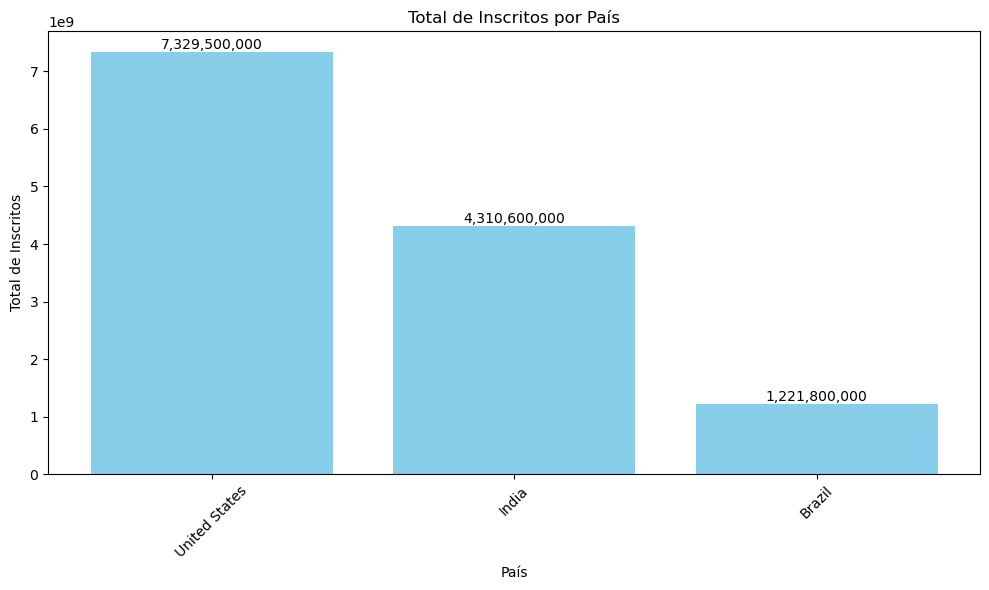

In [10]:
# Top 3 países com mais inscritos
total_inscritos_por_pais = dados.groupby('Country')['subscribers'].sum()

# Encontrando os três países com o maior número de inscritos
top_paises = total_inscritos_por_pais.nlargest(3)

# Preparando dados para o gráfico de barras
paises = top_paises.index
inscritos = top_paises.values

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(paises, inscritos, color='skyblue')
plt.title('Total de Inscritos por País')
plt.xlabel('País')
plt.ylabel('Total de Inscritos')

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50000,
             f'{inscritos[i]:,.0f}', ha='center', va='bottom', color='black', fontsize=10)

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

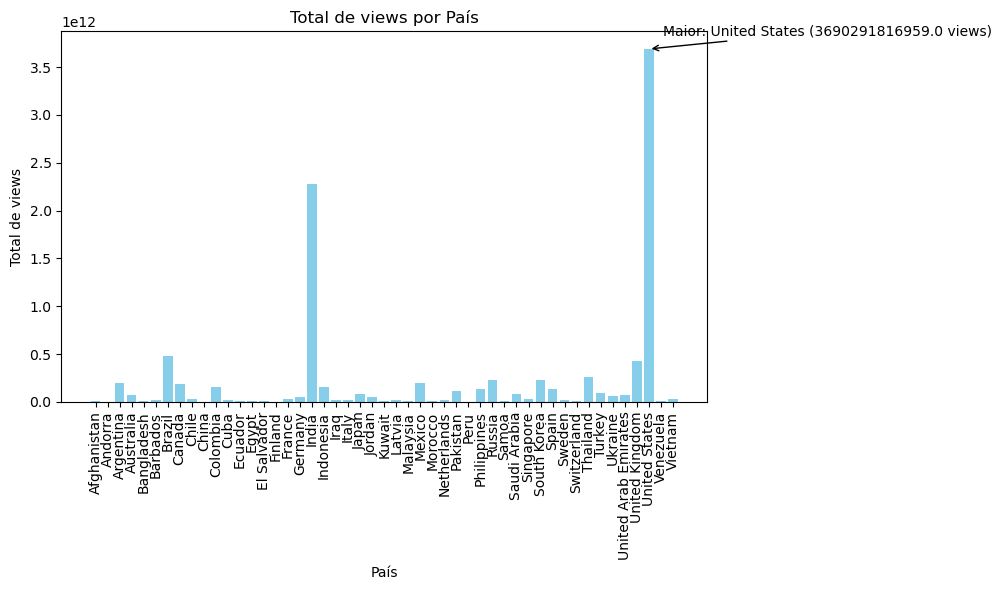

In [11]:
#Países com mais views
total_views_por_pais = dados.groupby('Country')['video views'].sum()

# Encontrando o país com o maior número de views
pais_maior_views = total_views_por_pais.idxmax()
maior_views = total_views_por_pais.max()

# Preparando dados para o gráfico de barras
paises = total_views_por_pais.index
views = total_views_por_pais.values

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(paises, views, color='skyblue')
plt.title('Total de views por País')
plt.xlabel('País')
plt.ylabel('Total de views')

# Adicionar anotação sobre o país com o maior número de views
plt.annotate(f'Maior: {pais_maior_views} ({maior_views} views)',
             xy=(paises.tolist().index(pais_maior_views), maior_views),
             xytext=(10, 10),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='black'))

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

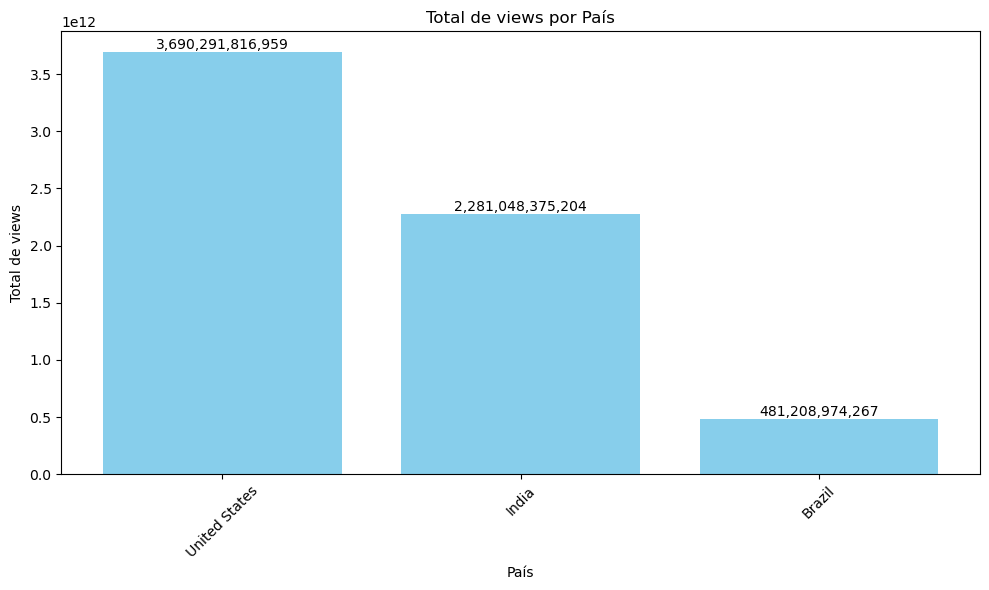

In [12]:
# Top 3 países com mais views
total_views_por_pais = dados.groupby('Country')['video views'].sum()

# Encontrando os três países com o maior número de views
top_paises = total_views_por_pais.nlargest(3)

# Preparando dados para o gráfico de barras
paises = top_paises.index
views = top_paises.values

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(paises, views, color='skyblue')
plt.title('Total de views por País')
plt.xlabel('País')
plt.ylabel('Total de views')

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50000,
             f'{views[i]:,.0f}', ha='center', va='bottom', color='black', fontsize=10)

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [13]:
#lista com todos os países do dataset, para depois separar em listas de acordo com a lingua.
lista_paises = dados['Country'].unique().tolist()
print(lista_paises)

['India', 'United States', nan, 'Japan', 'Russia', 'South Korea', 'United Kingdom', 'Canada', 'Brazil', 'Argentina', 'Chile', 'Cuba', 'El Salvador', 'Pakistan', 'Philippines', 'Thailand', 'Colombia', 'Barbados', 'Mexico', 'United Arab Emirates', 'Spain', 'Saudi Arabia', 'Indonesia', 'Turkey', 'Venezuela', 'Kuwait', 'Jordan', 'Netherlands', 'Singapore', 'Australia', 'Italy', 'Germany', 'France', 'Sweden', 'Afghanistan', 'Ukraine', 'Latvia', 'Switzerland', 'Vietnam', 'Malaysia', 'China', 'Iraq', 'Egypt', 'Andorra', 'Ecuador', 'Morocco', 'Peru', 'Bangladesh', 'Finland', 'Samoa']


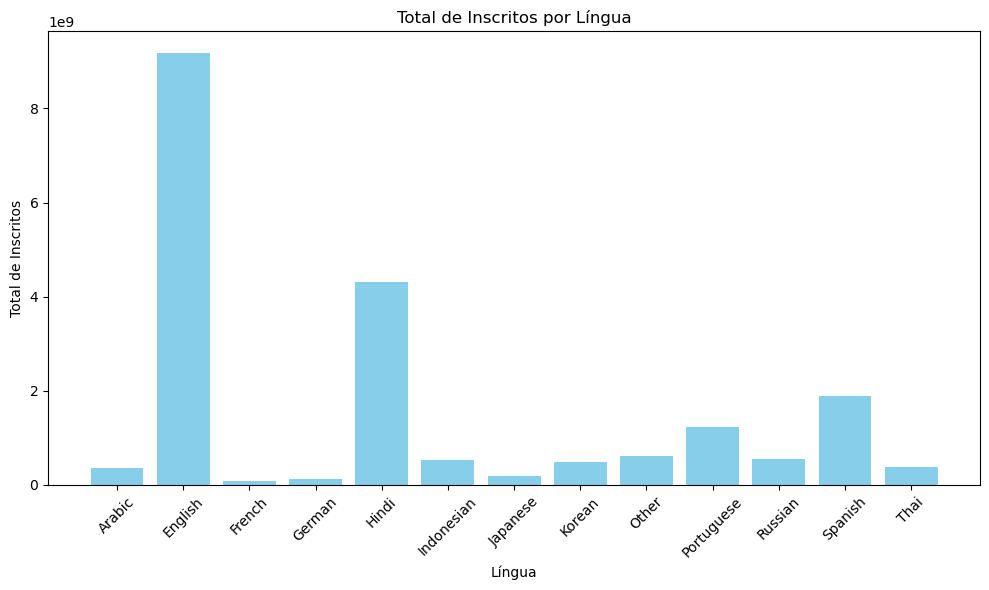

In [14]:
portugues = ['Brazil']
espanhol = ['Argentina', 'Chile', 'Cuba', 'El Salvador', 'Mexico', 'Spain', 'Colombia', 'Barbados', 'Venezuela', 'Dominican Republic', 'Ecuador', 'Peru']
ingles = ['United States', 'United Kingdom', 'Canada', 'Australia', 'Pakistan', 'Philippines']
hindi = ['India']
russo = ['Russia', 'Ukraine', 'Latvia' ]
alemao = ['Germany', 'Switzerland', 'Austria', 'Luxembourg', 'Liechtenstein', 'Belgium']
frances = ['France', 'Switzerland']
japones = ['Japan']
coreano = ['South Korea']
arabe = ['United Arab Emirates', 'Saudi Arabia', 'Kuwait']
tailandes = ['Thailand']
indonesio = ['Indonesia']

def categorizar_lingua(country):
    if pd.notnull(country):
        if country in portugues:
            return 'Portuguese'
        elif country in espanhol:
            return 'Spanish'
        elif country in ingles:
            return 'English'
        elif country in hindi:
            return 'Hindi'
        elif country in russo:
            return 'Russian'
        elif country in alemao:
            return 'German'
        elif country in frances:
            return 'French'
        elif country in japones:
            return 'Japanese'
        elif country in arabe:
            return 'Arabic'
        elif country in coreano:
            return 'Korean'
        elif country in tailandes:
            return 'Thai'
        elif country in indonesio:
            return 'Indonesian'
        else:
            return 'Other'

dados['Language'] = dados['Country'].apply(categorizar_lingua)

# Agrupando os dados por língua e calculando o total de inscritos
total_inscritos_por_lingua = dados.groupby('Language')['subscribers'].sum()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(total_inscritos_por_lingua.index, total_inscritos_por_lingua.values, color='skyblue')

# Adicionando rótulos e título
plt.title('Total de Inscritos por Língua')
plt.xlabel('Língua')
plt.ylabel('Total de Inscritos')

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


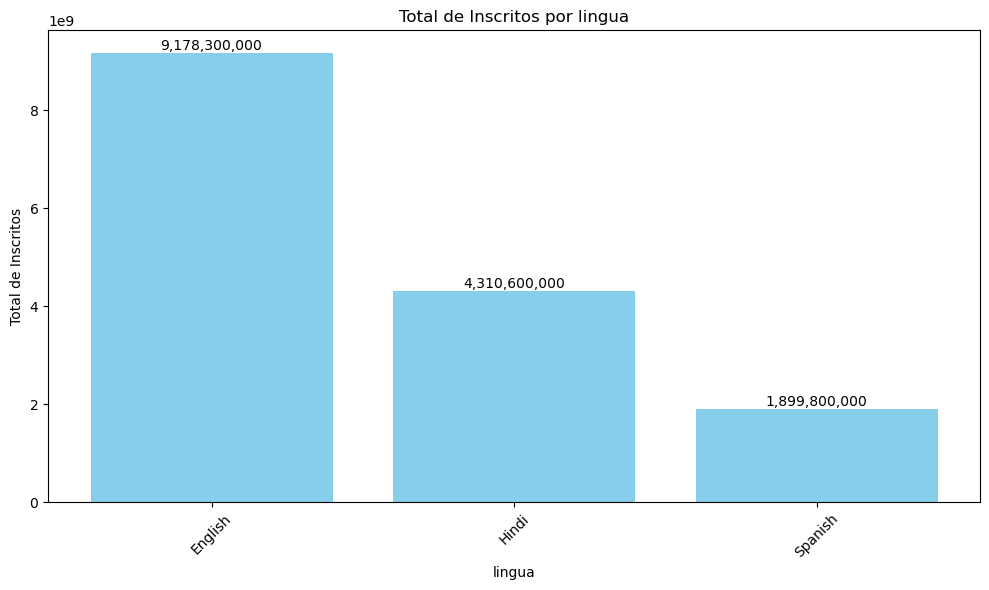

In [15]:
# Top 3 linguas com mais inscritos

# Encontrando os três linguas com o maior número de inscritos
top_linguas = total_inscritos_por_lingua.nlargest(3)

# Preparando dados para o gráfico de barras
linguas = top_linguas.index
inscritos = top_linguas.values

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(linguas, inscritos, color='skyblue')
plt.title('Total de Inscritos por lingua')
plt.xlabel('lingua')
plt.ylabel('Total de Inscritos')

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50000,
             f'{inscritos[i]:,.0f}', ha='center', va='bottom', color='black', fontsize=10)

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

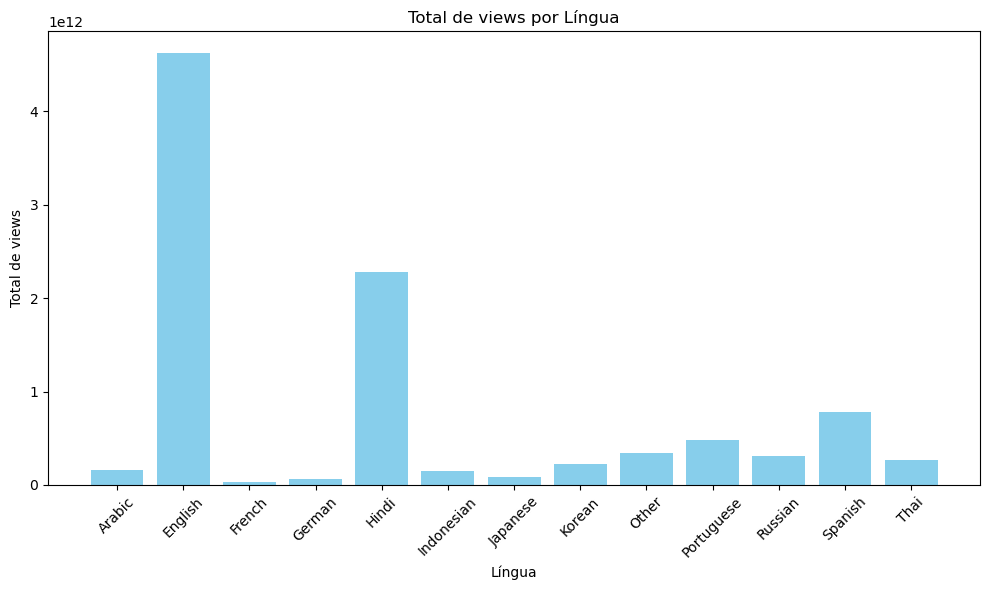

In [16]:
# Agrupando os dados por língua e calculando o total de views
total_views_por_lingua = dados.groupby('Language')['video views'].sum()

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(total_views_por_lingua.index, total_views_por_lingua.values, color='skyblue')

# Adicionando rótulos e título
plt.title('Total de views por Língua')
plt.xlabel('Língua')
plt.ylabel('Total de views')

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

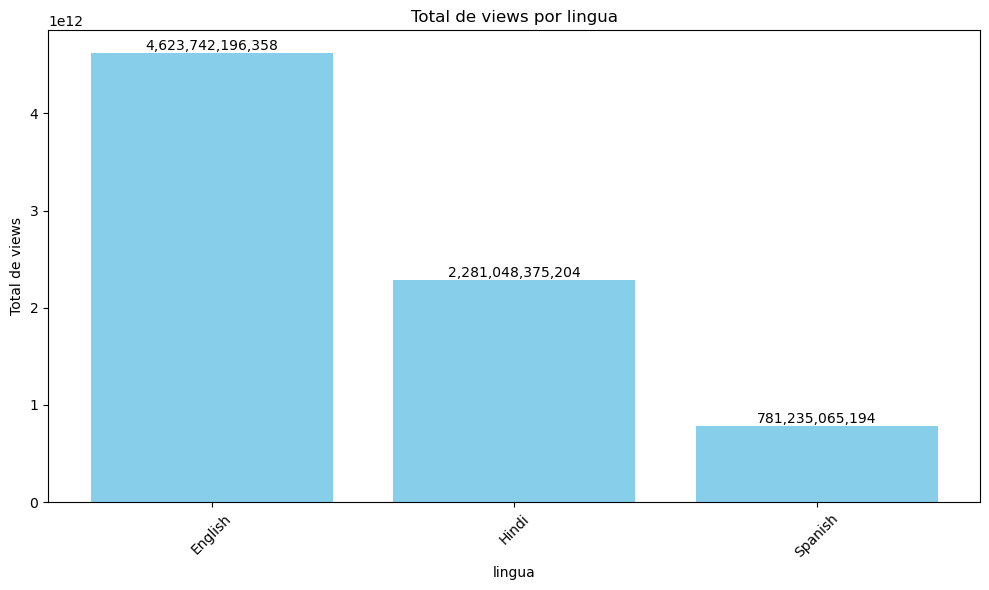

In [17]:
# Top 3 linguas com mais views

# Encontrando os três linguas com o maior número de views
top_linguas = total_views_por_lingua.nlargest(3)

# Preparando dados para o gráfico de barras
linguas = top_linguas.index
views = top_linguas.values

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(linguas, views, color='skyblue')
plt.title('Total de views por lingua')
plt.xlabel('lingua')
plt.ylabel('Total de views')


for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50000,
             f'{views[i]:,.0f}', ha='center', va='bottom', color='black', fontsize=10)

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

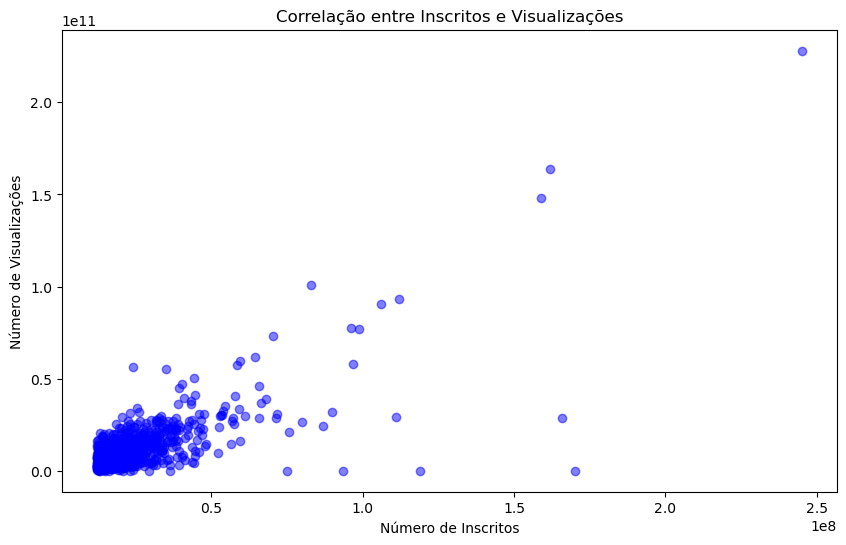

In [18]:
#Correlação entre numero de inscritos e número de views
# Plotando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(dados['subscribers'], dados['video views'], alpha=0.5, color='blue')

# Adicionando rótulos
plt.title('Correlação entre Inscritos e Visualizações')
plt.xlabel('Número de Inscritos')
plt.ylabel('Número de Visualizações')

# Exibindo o gráfico
plt.show()

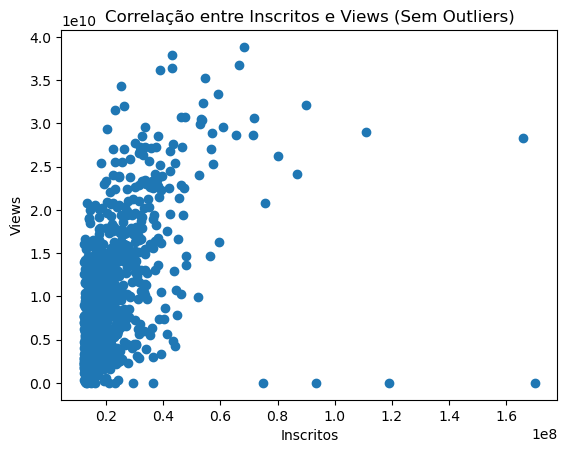

In [19]:
#Removendo outliers
mean_inscritos = dados['subscribers'].mean()
std_dev_inscritos = dados['subscribers'].std()

# Calculando os limites para remover os outliers para 'inscritos'
lower_limit_inscritos = mean_inscritos - 2 * std_dev_inscritos
upper_limit_inscritos = mean_inscritos + 2 * std_dev_inscritos

mean_views = dados['video views'].mean()
std_dev_views = dados['video views'].std()

# Calculando os limites para remover os outliers
lower_limit = mean_views - 2 * std_dev_views
upper_limit = mean_views + 2 * std_dev_views

filtered_data = dados[(dados['video views'] >= lower_limit) & (dados['video views'] <= upper_limit)]

plt.scatter(filtered_data['subscribers'], filtered_data['video views'])
plt.xlabel('Inscritos')
plt.ylabel('Views')
plt.title('Correlação entre Inscritos e Views (Sem Outliers)')
plt.show()

In [20]:
#mapas
gdf = gpd.read_file("countries.geojson")

In [21]:
inscritos_por_pais = dados.groupby('Country')['subscribers'].sum().reset_index()
merged = gdf.set_index('ADMIN').join(inscritos_por_pais.set_index('Country'))

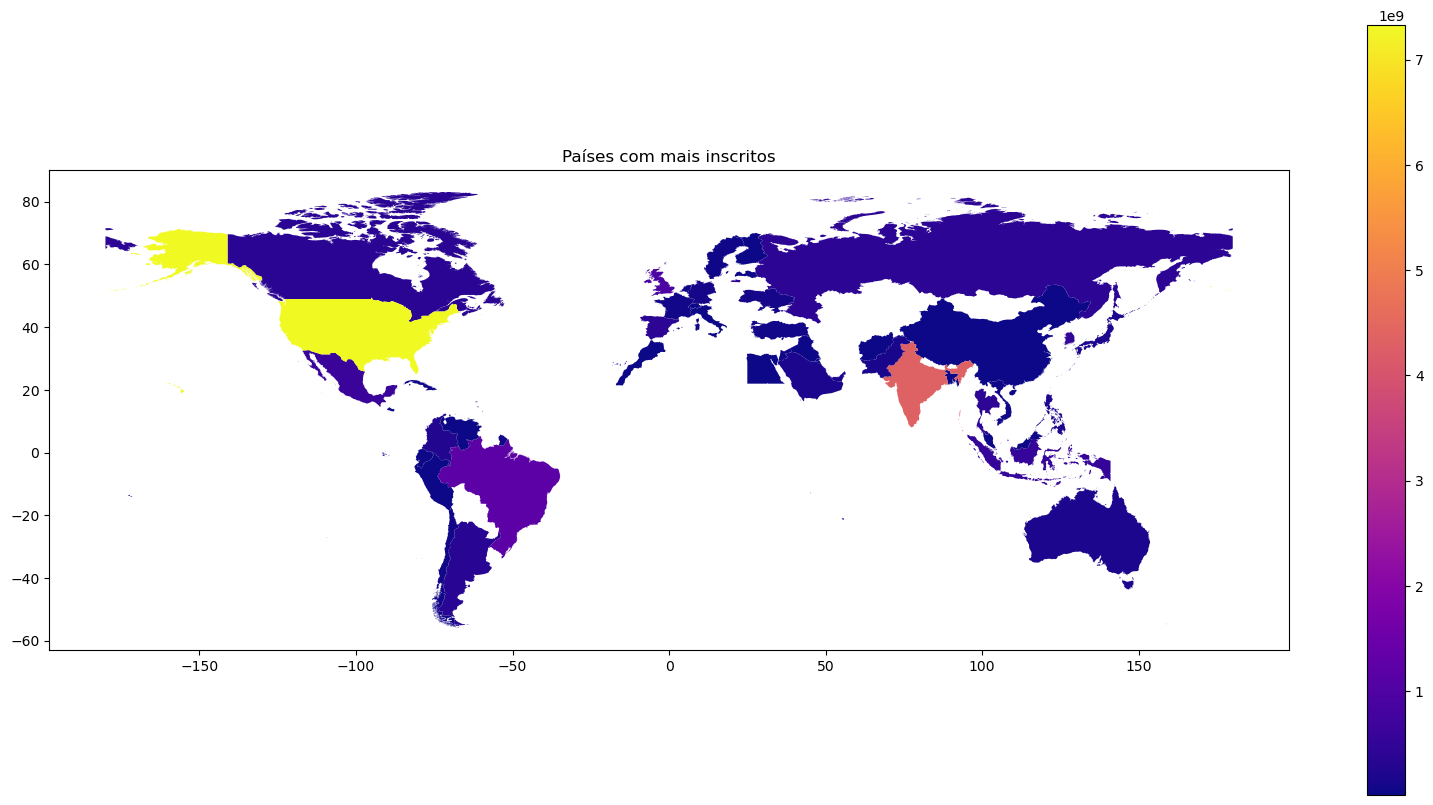

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
merged.plot(column='subscribers',cmap = 'plasma',  ax=ax, legend=True)
plt.title('Países com mais inscritos')
plt.show()

In [23]:
inscritos_por_pais_30dias = dados.groupby('Country')['subscribers_for_last_30_days'].sum().reset_index()
merged = gdf.set_index('ADMIN').join(inscritos_por_pais_30dias.set_index('Country'))

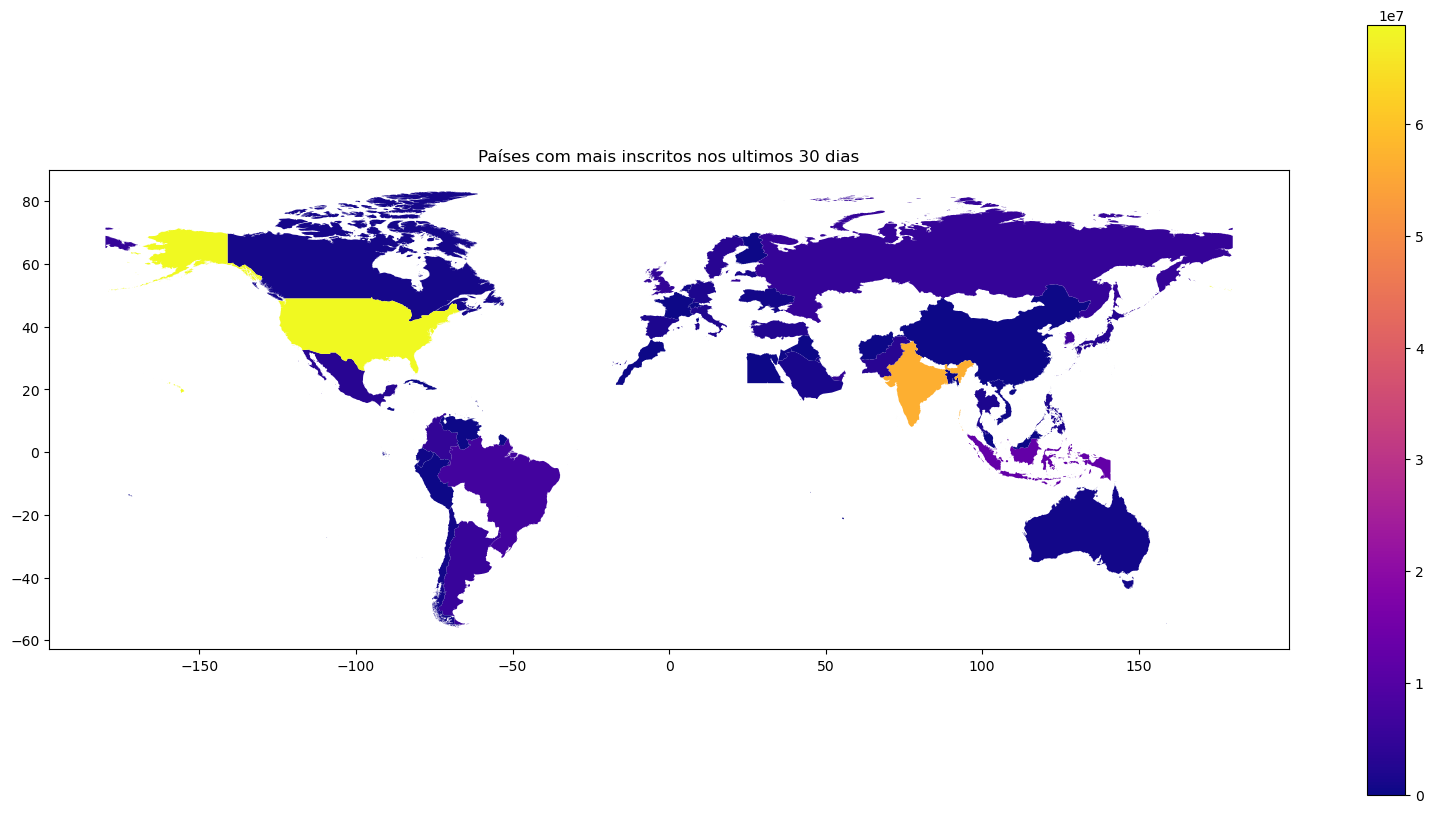

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
merged.plot(column='subscribers_for_last_30_days',cmap = 'plasma',  ax=ax, legend=True)
plt.title('Países com mais inscritos nos ultimos 30 dias')
plt.show()

In [25]:
views_por_pais = dados.groupby('Country')['video views'].sum().reset_index()
merged = gdf.set_index('ADMIN').join(views_por_pais.set_index('Country'))

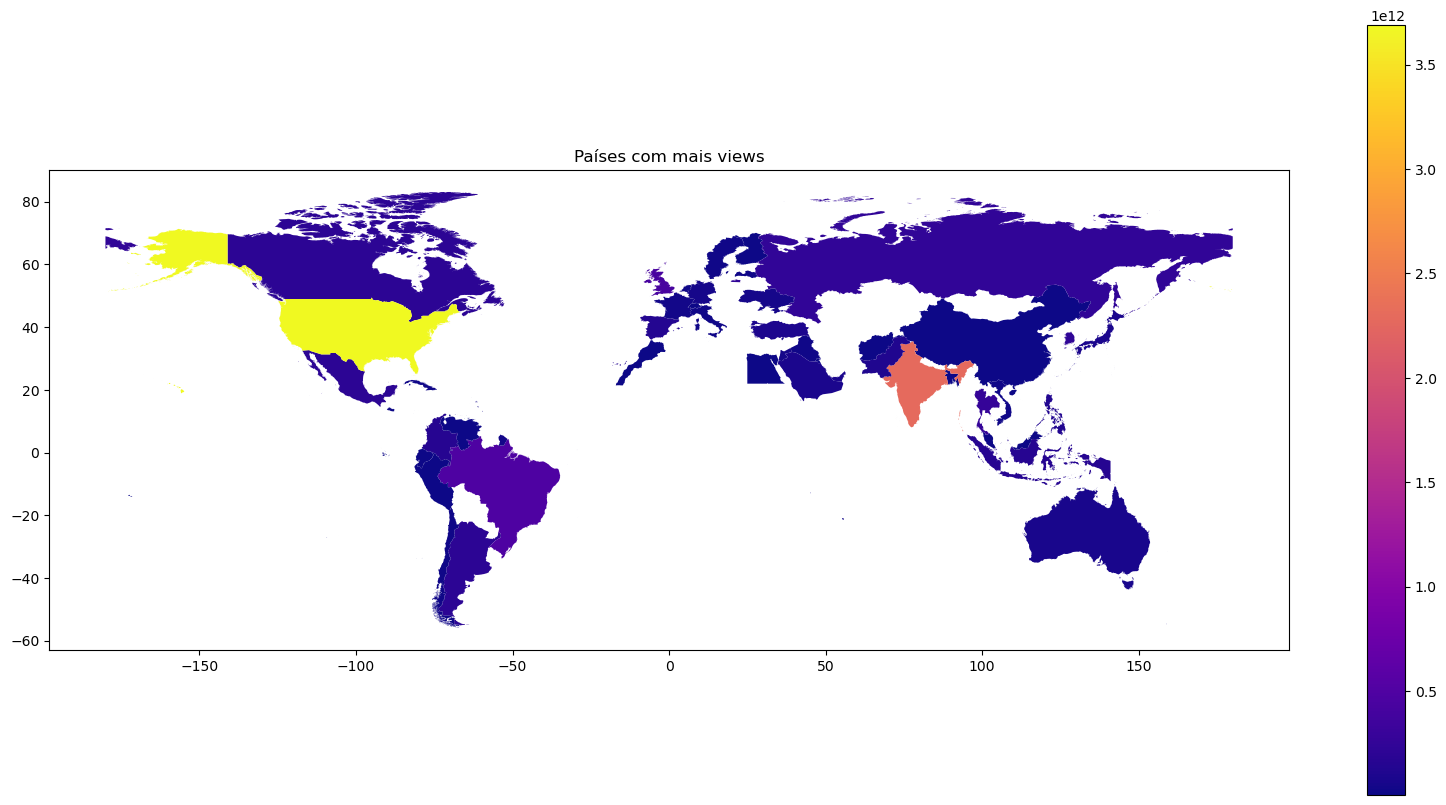

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
merged.plot(column='video views',cmap = 'plasma',  ax=ax, legend=True)
plt.title('Países com mais views')
plt.show()

In [27]:
views_por_pais_30dias = dados.groupby('Country')['video_views_for_the_last_30_days'].sum().reset_index()
merged = gdf.set_index('ADMIN').join(views_por_pais_30dias.set_index('Country'))

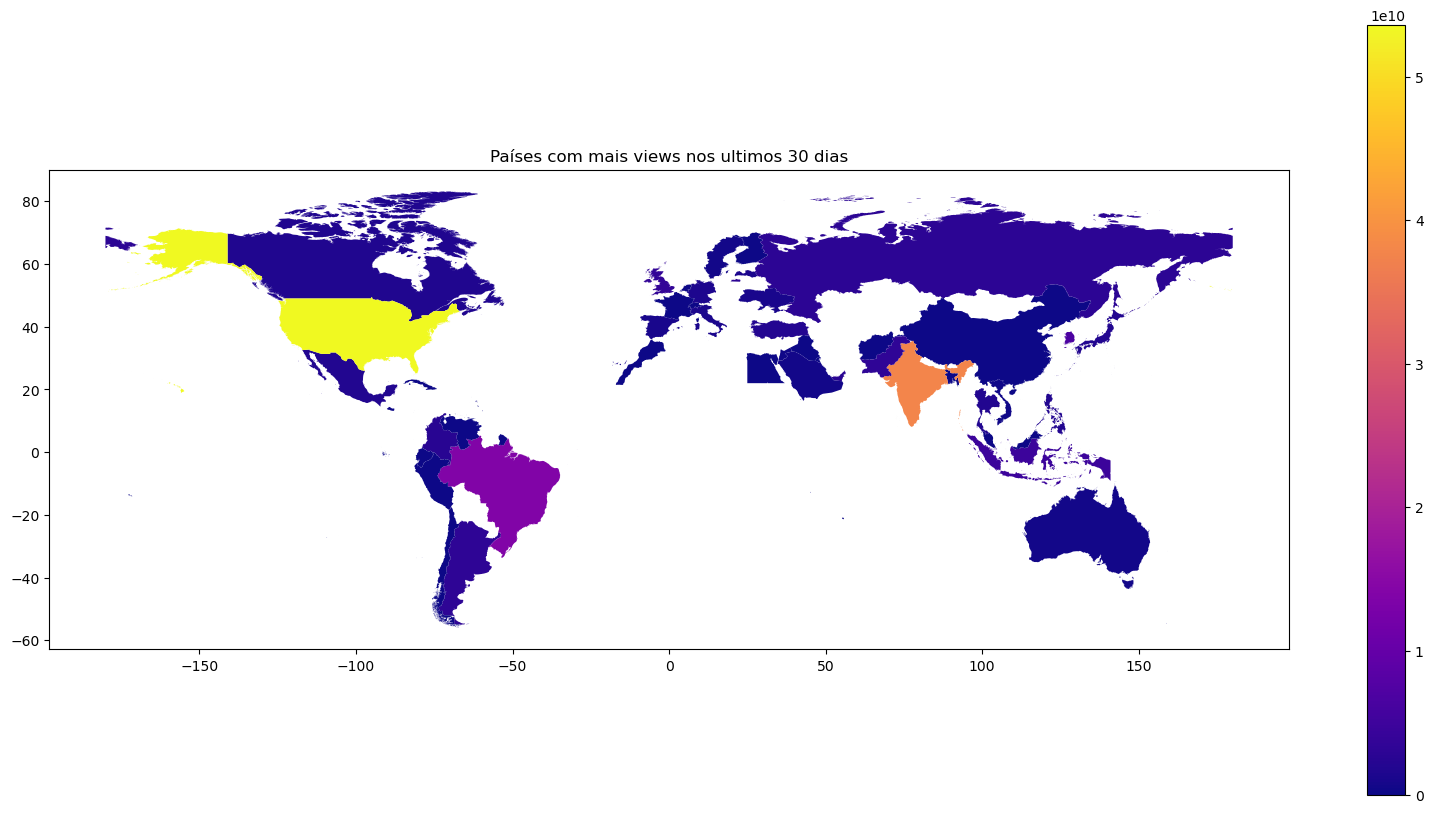

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
merged.plot(column='video_views_for_the_last_30_days',cmap = 'plasma',  ax=ax, legend=True)
plt.title('Países com mais views nos ultimos 30 dias')
plt.show()

In [29]:
#G2
dados

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Language
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,Hindi
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,English
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,English
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,English
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,Hindi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280,Portuguese
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,Hindi
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973,English
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501,Other


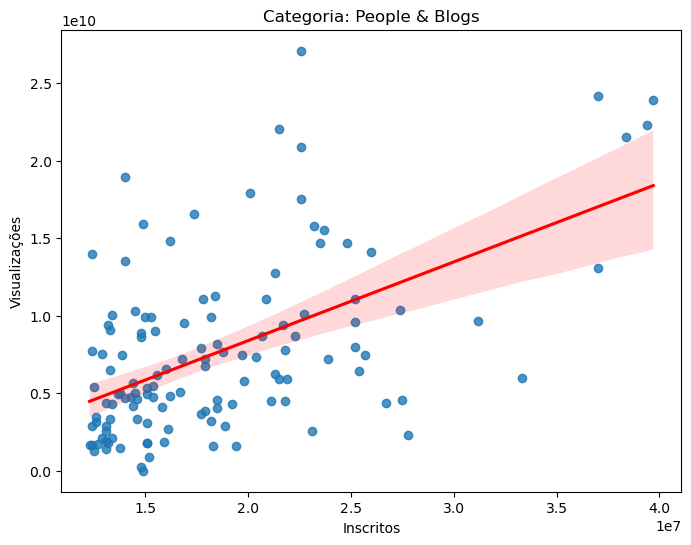

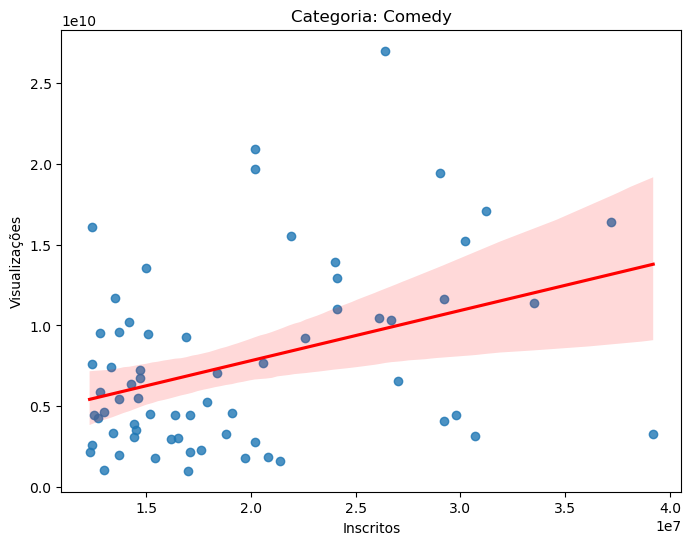

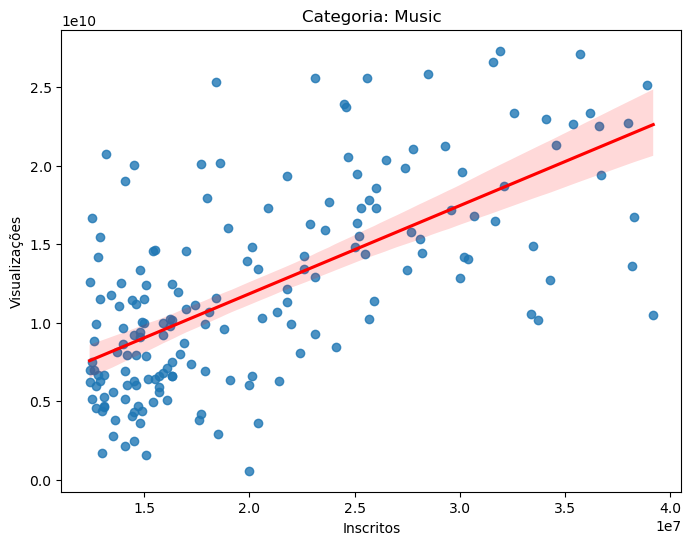

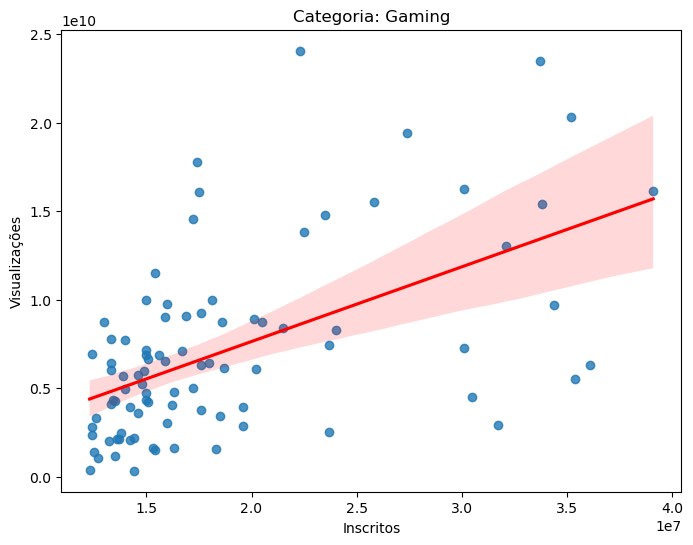

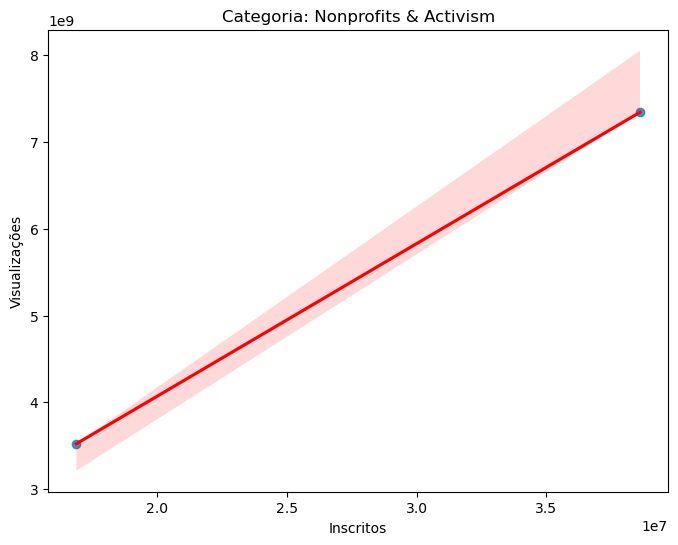

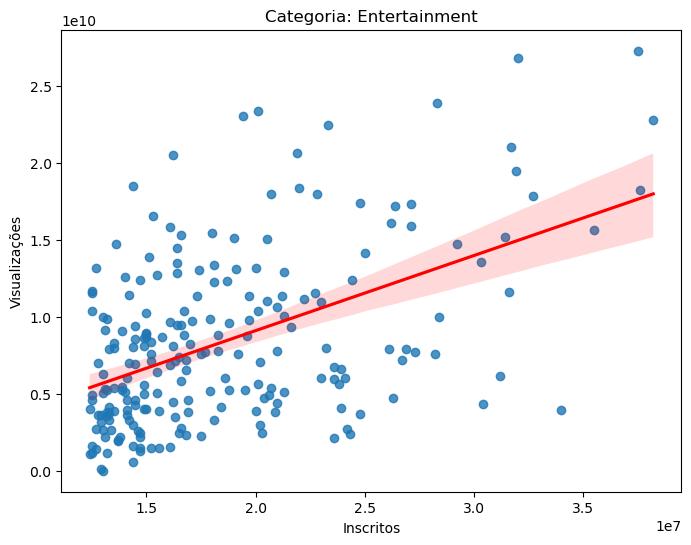

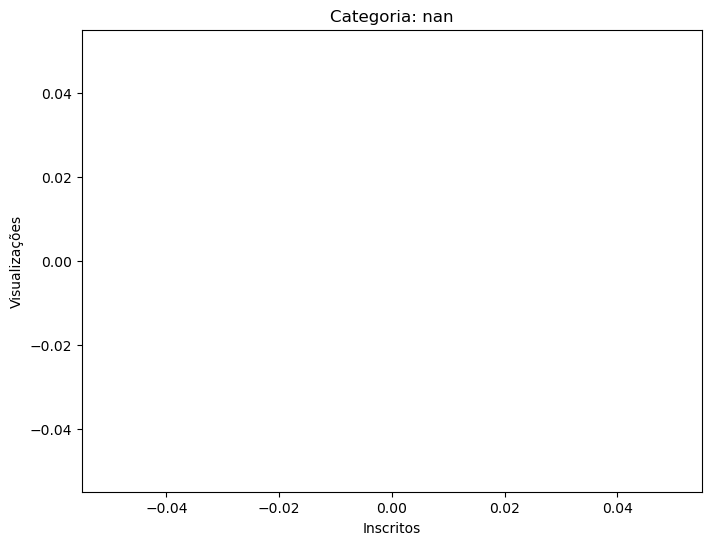

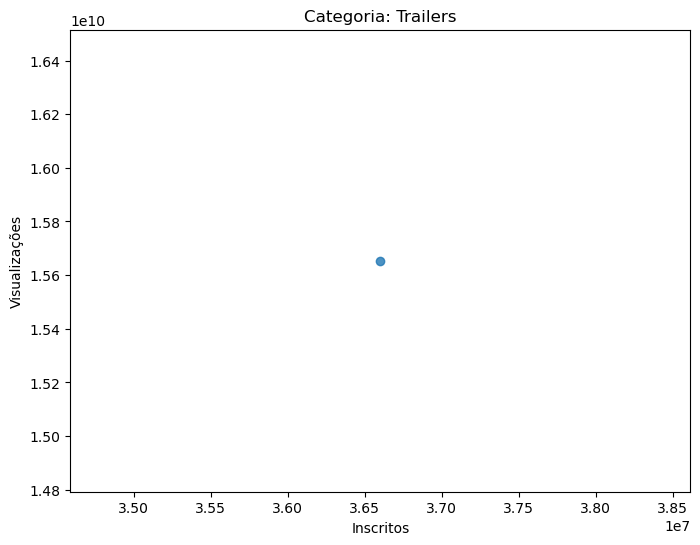

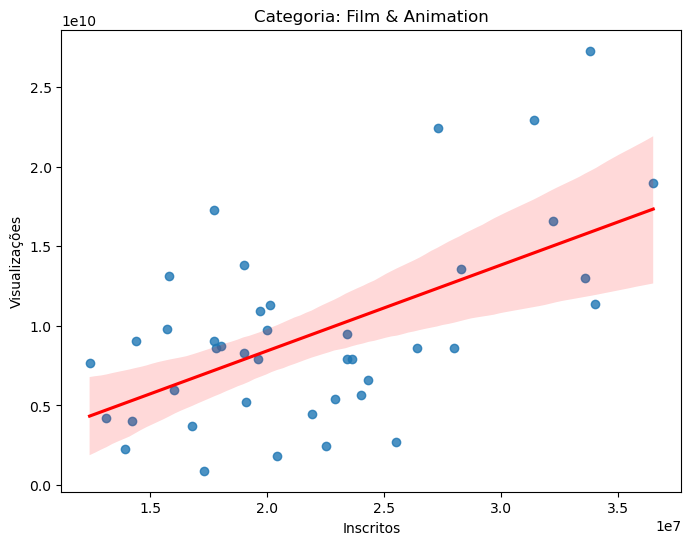

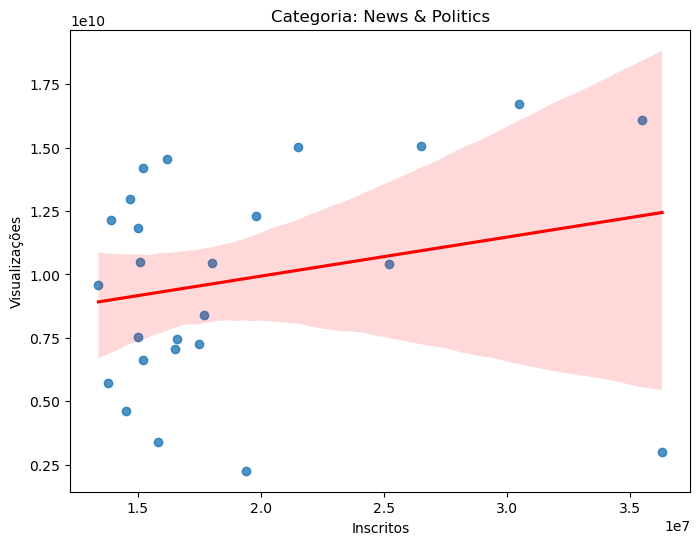

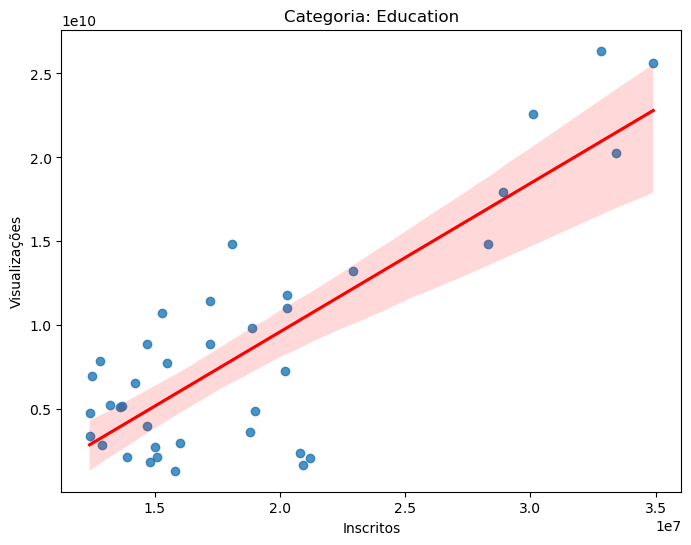

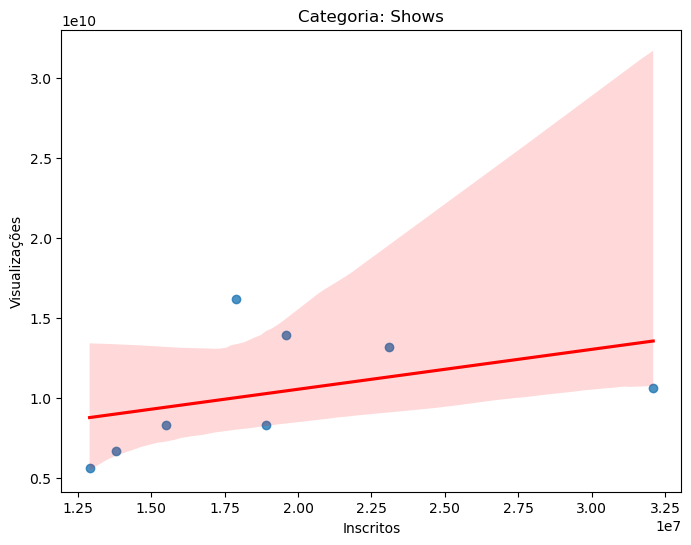

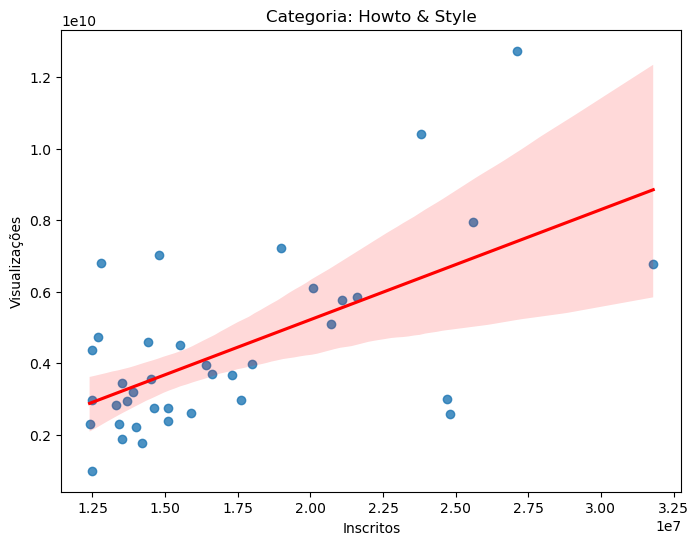

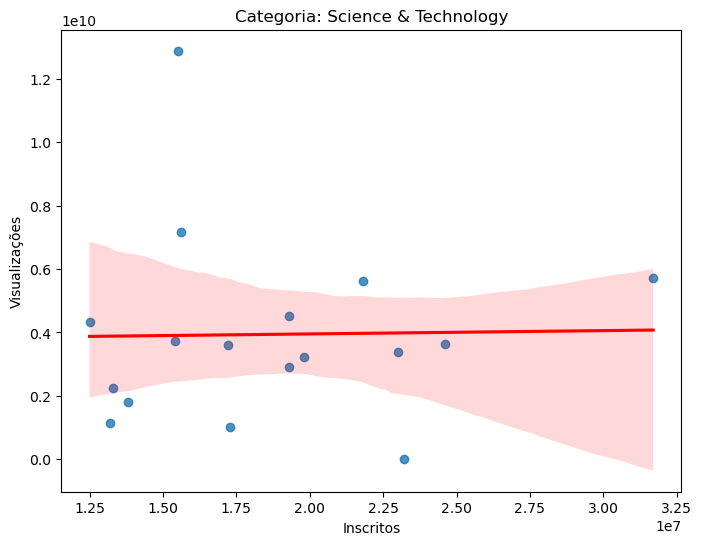

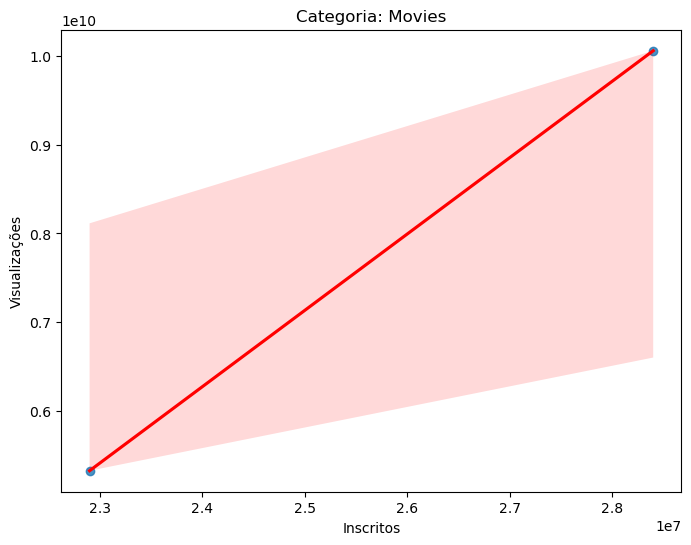

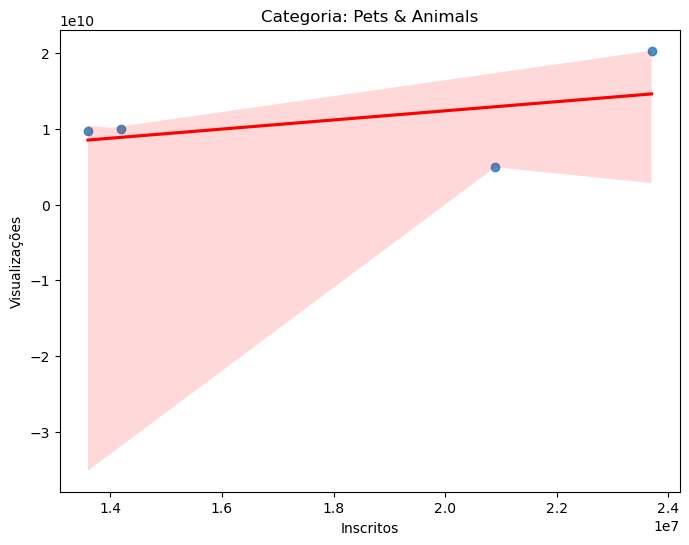

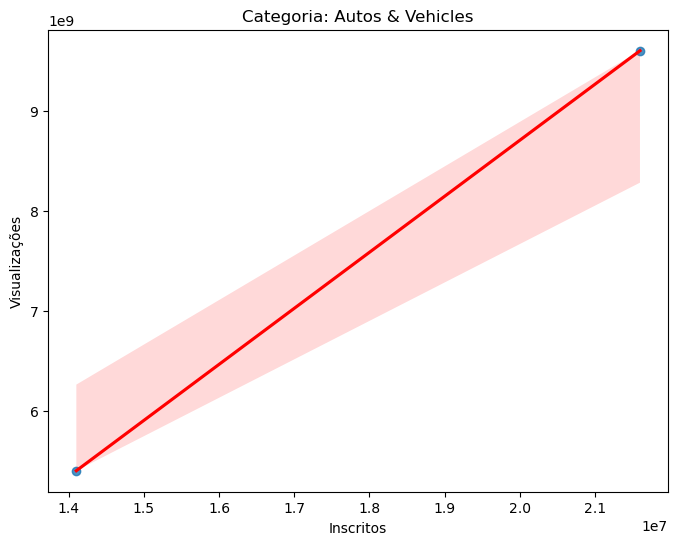

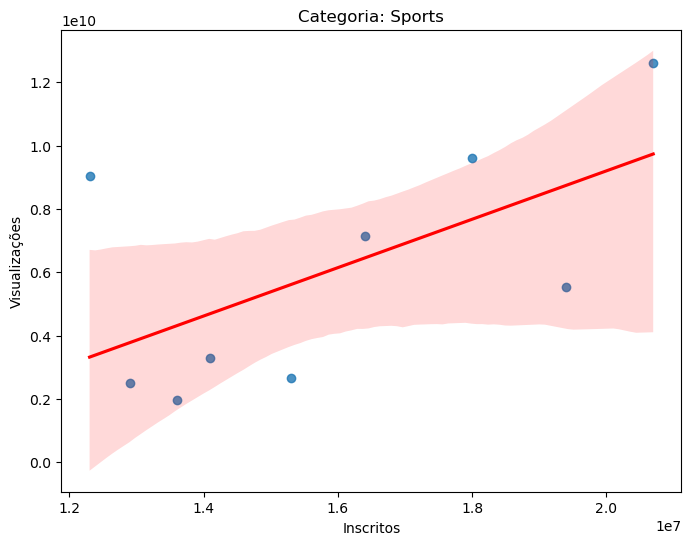

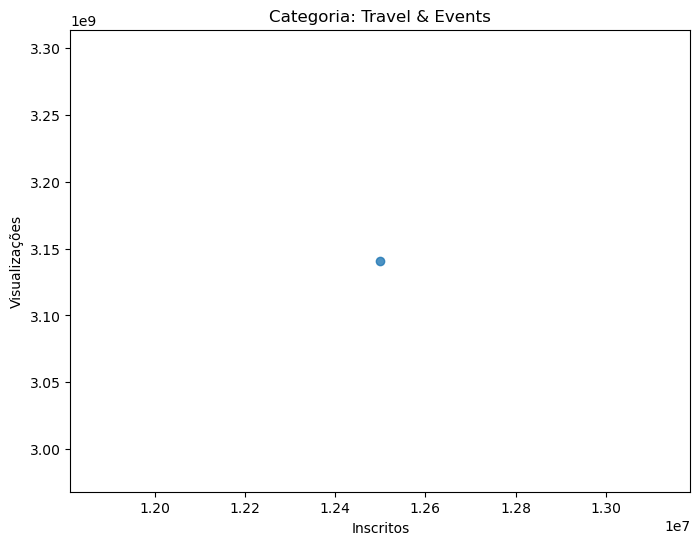

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Defina as variáveis para 'inscritos' e 'visualizações'
subscribers_data = dados['subscribers']
views_data = dados['video views']

# Calculando o IQR para 'inscritos' e 'visualizações'
Q1_subscribers = subscribers_data.quantile(0.25)
Q3_subscribers = subscribers_data.quantile(0.75)
IQR_subscribers = Q3_subscribers - Q1_subscribers

Q1_views = views_data.quantile(0.25)
Q3_views = views_data.quantile(0.75)
IQR_views = Q3_views - Q1_views

# Defina os limites para 'inscritos' e 'visualizações' baseados no IQR
lower_limit_subscribers = Q1_subscribers - 1.5 * IQR_subscribers
upper_limit_subscribers = Q3_subscribers + 1.5 * IQR_subscribers

lower_limit_views = Q1_views - 1.5 * IQR_views
upper_limit_views = Q3_views + 1.5 * IQR_views

# Filtrar os dados usando os limites definidos pelo IQR
filtered_data = dados[
    (dados['subscribers'] >= lower_limit_subscribers) & (dados['subscribers'] <= upper_limit_subscribers) &
    (dados['video views'] >= lower_limit_views) & (dados['video views'] <= upper_limit_views)
]

categories = filtered_data['category'].unique()

for category in categories:
    subset_data = filtered_data[filtered_data['category'] == category]
    
    # Crie uma nova figura para cada categoria
    plt.figure(figsize=(8, 6))
    
    # Plote um gráfico de dispersão com linha de tendência para a categoria de canal atual
    sns.regplot(x='subscribers', y='video views', data=subset_data, line_kws={"color":"red"})
    plt.title(f'Categoria: {category}')
    plt.xlabel('Inscritos')
    plt.ylabel('Visualizações')
    
    plt.show()  # Mostra um gráfico para cada categoria


In [45]:
from scipy.stats import f_oneway

# Defina o número mínimo de dados para considerar uma categoria válida
min_data_threshold = 10

# Crie um filtro para selecionar apenas as categorias com dados suficientes
valid_categories = []
for category in dados['category'].unique():
    subset_data = dados[dados['category'] == category]['subscribers']
    if len(subset_data) >= min_data_threshold:
        valid_categories.append(category)

# Separando os dados por categoria apenas para categorias válidas
category_groups = [dados[dados['category'] == category]['subscribers'] for category in valid_categories]

# Teste ANOVA para inscritos apenas nas categorias válidas
f_statistic, p_value = f_oneway(*category_groups)
print(f'P-valor para diferenças nas médias de inscritos entre categorias válidas: {p_value}')

P-valor para diferenças nas médias de inscritos entre categorias válidas: 9.167444338032919e-05


In [46]:
# Calcular a correlação para cada categoria de canal
categories = dados['category'].unique()

for category in categories:
    subset_data = dados[dados['category'] == category]
    correlation = subset_data[['subscribers', 'video views']].corr().iloc[0, 1]
    print(f'Correlação entre inscritos e visualizações na categoria {category}: {correlation}')


Correlação entre inscritos e visualizações na categoria Music: 0.8960529718972766
Correlação entre inscritos e visualizações na categoria Film & Animation: 0.24116104357752852
Correlação entre inscritos e visualizações na categoria Entertainment: 0.6183072403708403
Correlação entre inscritos e visualizações na categoria Education: 0.9525617158537676
Correlação entre inscritos e visualizações na categoria Shows: 0.9777117782281723
Correlação entre inscritos e visualizações na categoria nan: nan
Correlação entre inscritos e visualizações na categoria People & Blogs: 0.8592055365573837
Correlação entre inscritos e visualizações na categoria Gaming: 0.6342088914902752
Correlação entre inscritos e visualizações na categoria Sports: 0.9231278162693964
Correlação entre inscritos e visualizações na categoria Howto & Style: 0.8918460109756968
Correlação entre inscritos e visualizações na categoria News & Politics: 0.5722425528695488
Correlação entre inscritos e visualizações na categoria Comedy

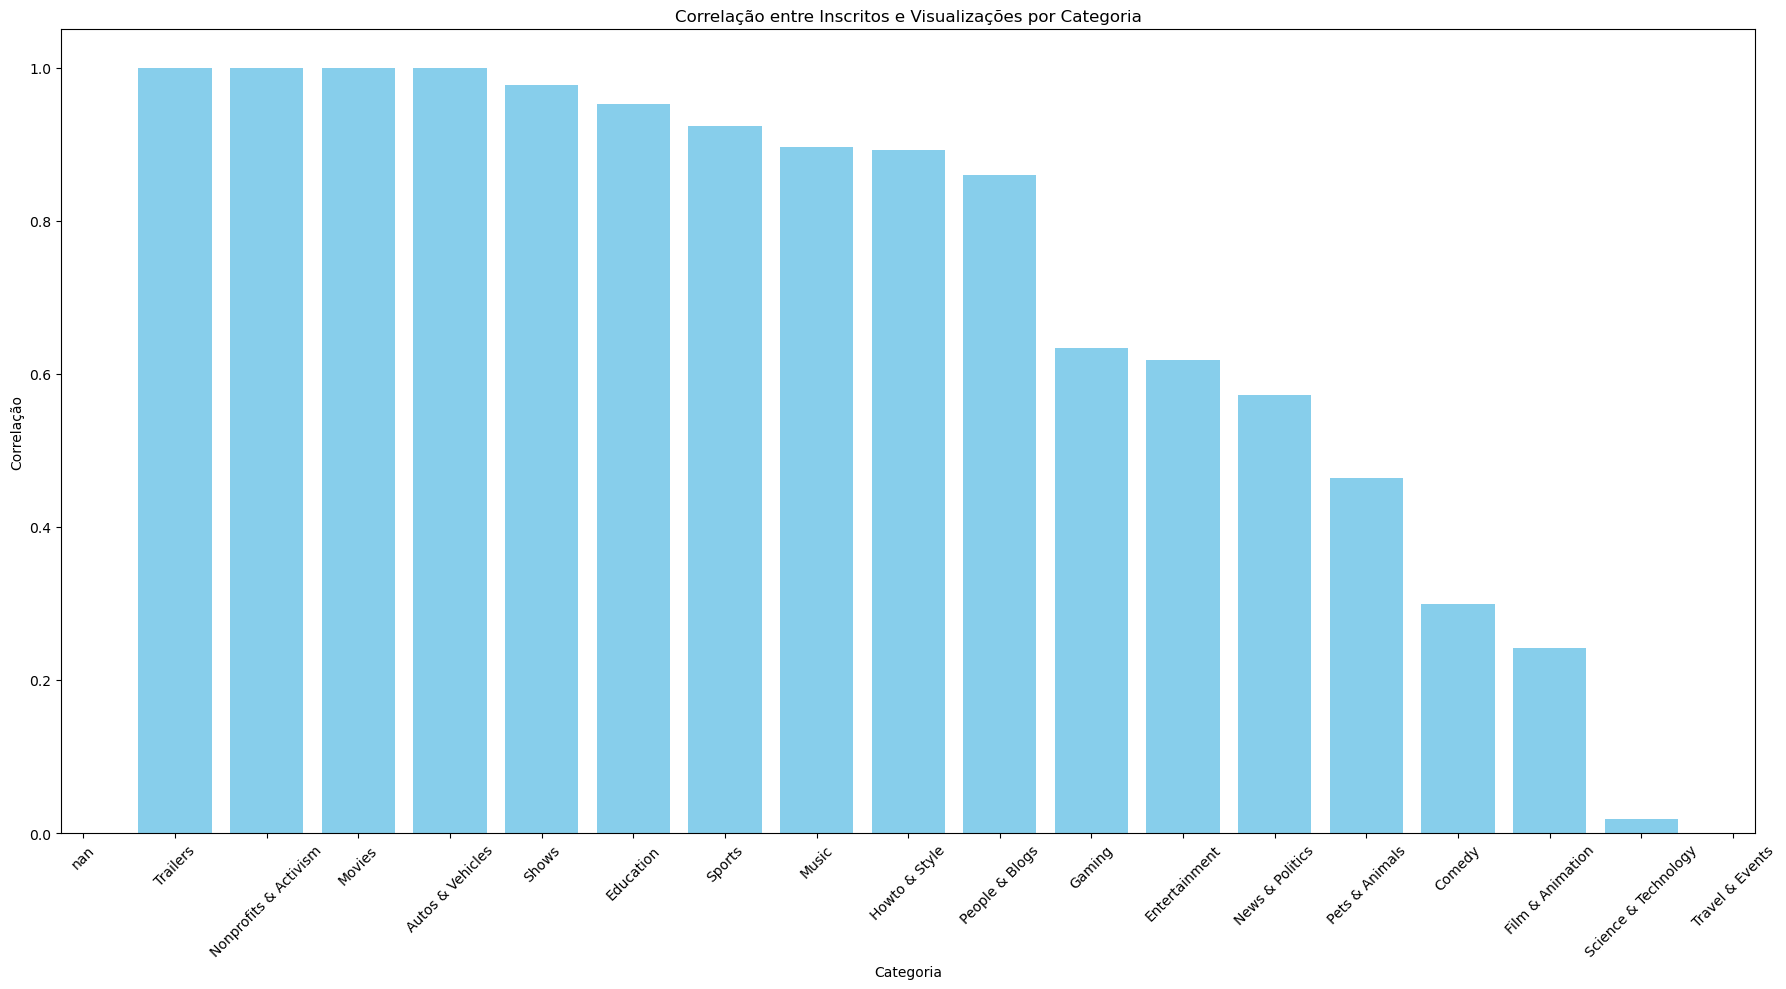

In [51]:
import matplotlib.pyplot as plt

# Calculando as correlações para cada categoria de canal
categories = dados['category'].unique()
correlations = []

for category in categories:
    subset_data = dados[dados['category'] == category]
    correlation = subset_data[['subscribers', 'video views']].corr().iloc[0, 1]
    correlations.append(correlation)

# Criando uma lista de tuplas (categoria, correlação) e ordenando pelo valor da correlação
correlation_tuples = list(zip(categories, correlations))
correlation_tuples.sort(key=lambda x: x[1], reverse=True)  # Ordena do maior para o menor

# Separando as categorias e correlações ordenadas
categories_sorted, correlations_sorted = zip(*correlation_tuples)

# Convertendo as categorias para strings
categories_sorted = [str(category) for category in categories_sorted]

# Criando um gráfico de barras para as correlações ordenadas
plt.figure(figsize=(18, 10))
plt.bar(categories_sorted, correlations_sorted, color='skyblue')
plt.title('Correlação entre Inscritos e Visualizações por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Correlação')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
